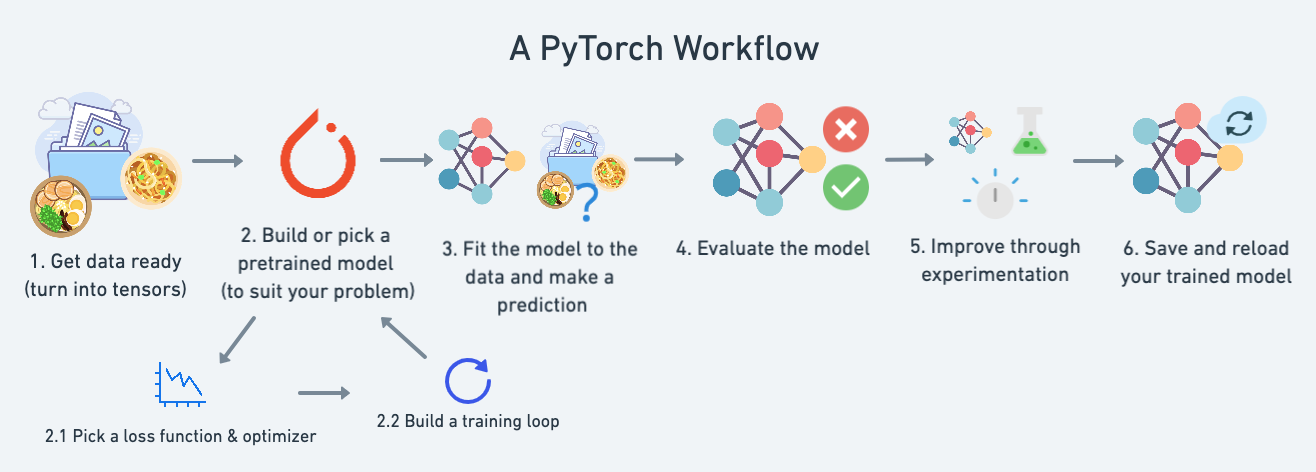

In [1]:
import torch
from torch import nn # neural network
import matplotlib.pyplot as plt

torch.__version__

'2.5.1'

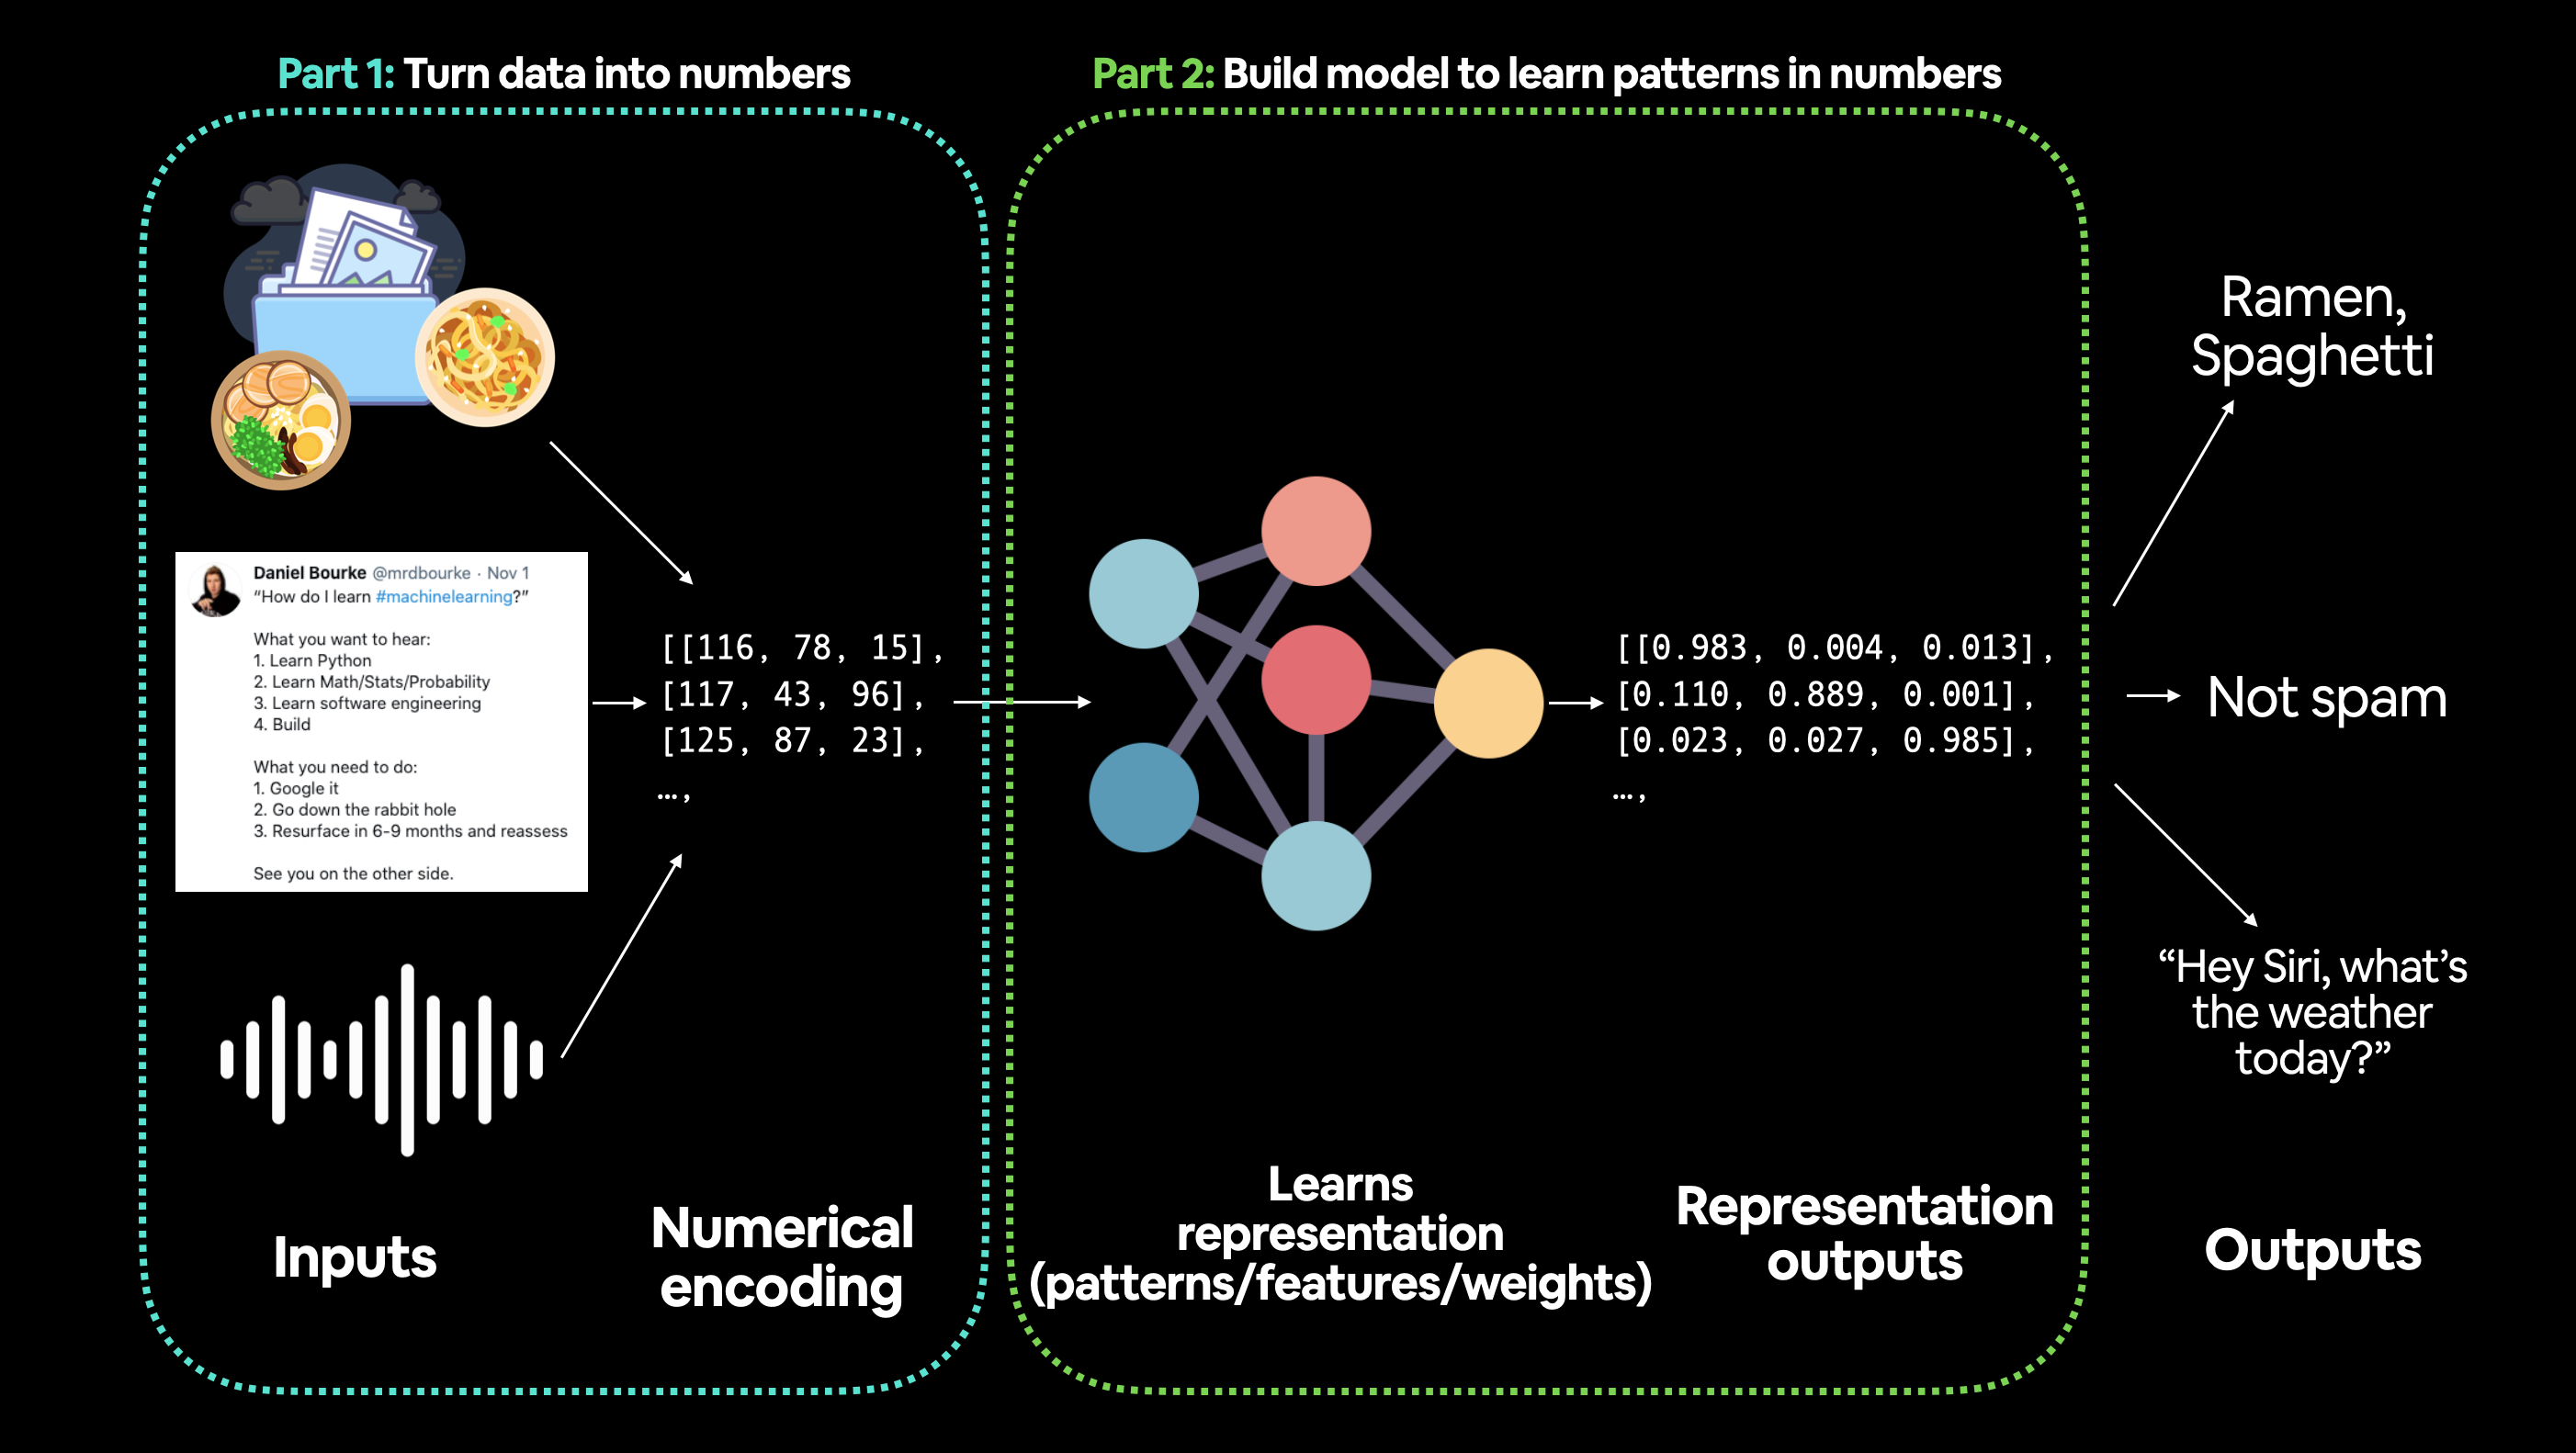

#### 1. Data (preparing and loading)

In [2]:
# Create random parameters

weights = 0.7
bias = 0.3

# Creat data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias

print(X[:10],"\n\n" ,y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 

 tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


#### Split data into training and test sets

In [3]:
trian_split = int(0.8 * len(X))
X_train, y_train = X[:trian_split], y[:trian_split]
X_test, y_test = X[trian_split: ], y[trian_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


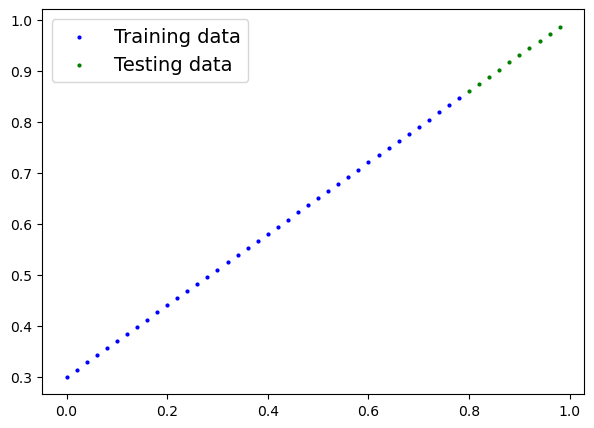

In [4]:
def plot_perdictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(7, 5))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    # Plot the predictions in red
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    # Show the legend
    plt.legend(prop={'size' : 14})

plot_perdictions()

#### 2. Build model

In [5]:
# Creat a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # Foward dfines thecomputation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x 는 input data
        return self.weights * x + self.bias

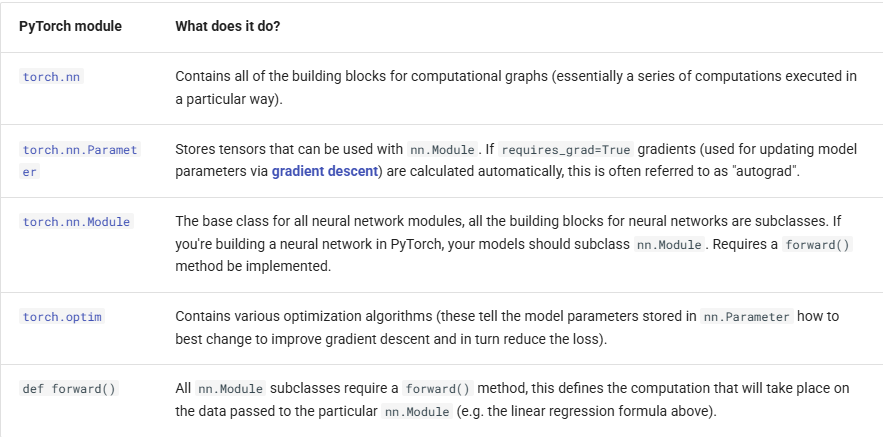
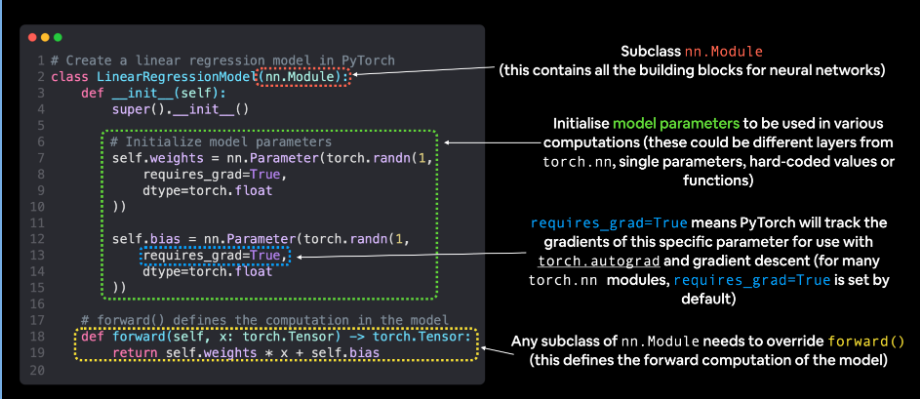

#### Checking the contents of a PyTorch model

In [6]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making predictions using torch.inference_mode()

Number of testing samples : 10
Number of predictions made : 10
Predicted values : tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


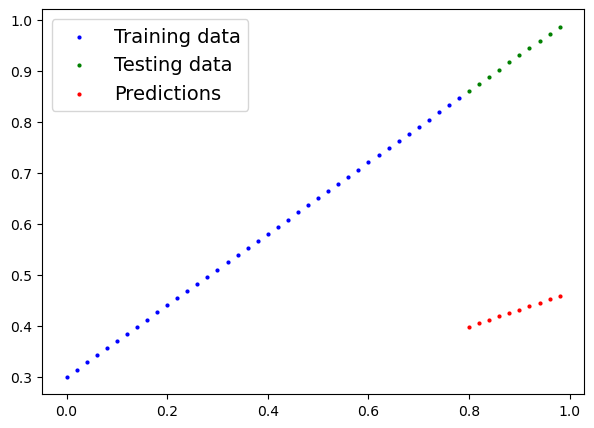

In [7]:
with torch.inference_mode(): # 이렇게 하면 미분 이런거 자장 안해서 더 빠르다 
    y_preds = model_0(X_test)

# Check the predictions
print('Number of testing samples : {}'.format(len(X_test)))
print('Number of predictions made : {}'.format(len(y_preds)))
print('Predicted values : {}'.format(y_preds))
plot_perdictions(predictions=y_preds)

#### 3. Train model
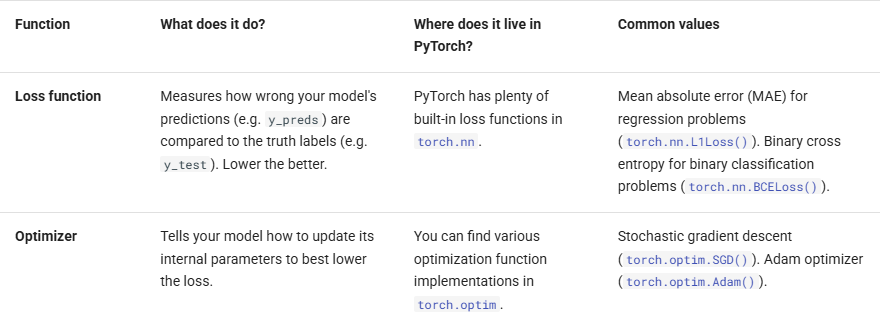

In [8]:
# Create the loss function
loss_fn = nn.L1Loss() # use MAE loss function

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

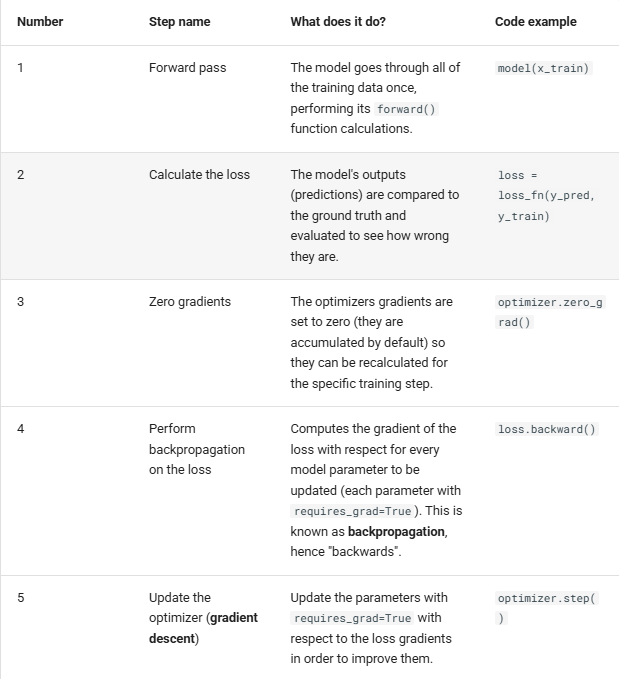

In [9]:
torch.manual_seed(42)
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    # Put model in training mode 
    model_0.train()
    
    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    # 6. Progress the optimizer
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)

        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float32))

        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print("Epoch :  {} | MAE Train Loss : {} | MAE test Loss : {}".format(epoch, loss, test_loss))




Epoch :  0 | MAE Train Loss : 0.31288138031959534 | MAE test Loss : 0.48106518387794495
Epoch :  10 | MAE Train Loss : 0.1976713240146637 | MAE test Loss : 0.3463551998138428
Epoch :  20 | MAE Train Loss : 0.08908725529909134 | MAE test Loss : 0.21729660034179688
Epoch :  30 | MAE Train Loss : 0.053148526698350906 | MAE test Loss : 0.14464017748832703
Epoch :  40 | MAE Train Loss : 0.04543796554207802 | MAE test Loss : 0.11360953003168106
Epoch :  50 | MAE Train Loss : 0.04167863354086876 | MAE test Loss : 0.09919948130846024
Epoch :  60 | MAE Train Loss : 0.03818932920694351 | MAE test Loss : 0.08886633068323135
Epoch :  70 | MAE Train Loss : 0.03476089984178543 | MAE test Loss : 0.0805937647819519
Epoch :  80 | MAE Train Loss : 0.03132382780313492 | MAE test Loss : 0.07232122868299484
Epoch :  90 | MAE Train Loss : 0.02788739837706089 | MAE test Loss : 0.06473556160926819


The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


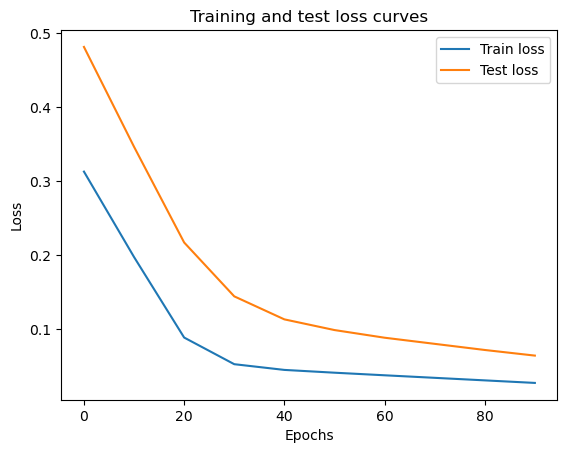

In [10]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weights}, bias: {bias}")

#### 4. Making predictions with a trained PyTorch model (inference)

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])


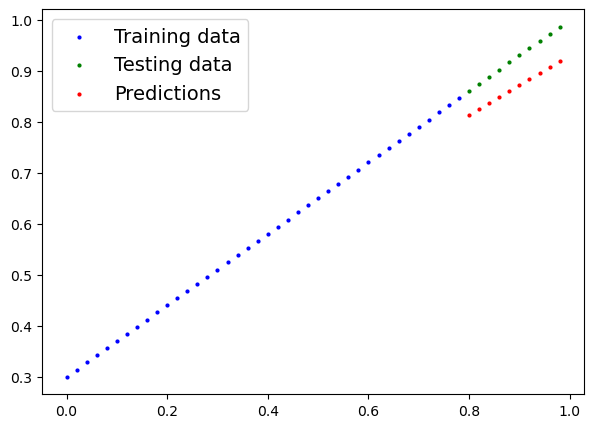

In [11]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_pred = model_0(X_test)
print(y_pred)
plot_perdictions(predictions=y_pred)


#### 5. Saving and loading a PyTorch model

In [12]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Creat model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print("Saving model to : {}".format(MODEL_SAVE_PATH))
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth


Saving model to : models\01_pytorch_workflow_model_0.pth


'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [13]:
#### Loading a saved PyTorch model's ####
# Instantiate a new instance of our model 
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
print(y_pred == loaded_model_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


C:\Users\ijaeh\AppData\Local\Temp\ipykernel_2556\2381801948.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#### 6. Putting it all together

In [14]:
# Import Pytorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check Pytorch version
torch.__version__

'2.5.1'

In [15]:
# Setup device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device : {}".format(device))

Using device : cuda


In [16]:
# Creat weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.01

# Create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

80 80 20 20


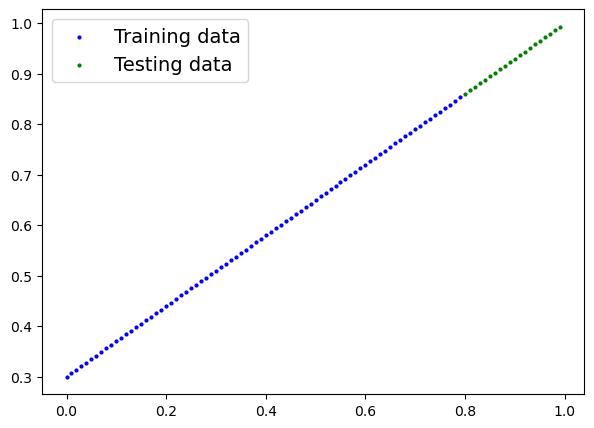

In [17]:
# Split data
trian_split = int(0.8 * len(X))
X_train, y_train = X[:trian_split], y[:trian_split]
X_test, y_test = X[trian_split:], y[trian_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))
plot_perdictions(X_train, y_train, X_test, y_test)

In [18]:
# Subclass nn.Module to make own model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [19]:
# Check model device
print(next(model_1.parameters()).device)

# Set model to GPU if it's available
model_1.to(device)
print(next(model_1.parameters()).device)

cpu
cuda:0


In [20]:
#### Training ####
# Create loss function
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01) # optimize new

torch.manual_seed(42)

# Set the number of Epoch
epochs = 1000

# Put data on the available device
# Without this, error will happen
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    #### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    # Testing 
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 100 == 0:
        print("Epoch : {} | Train loss : {} | Test loss {}".format(epoch, loss, test_loss))

Epoch : 0 | Train loss : 0.5555006265640259 | Test loss 0.574234664440155
Epoch : 100 | Train loss : 0.006589987780898809 | Test loss 0.014520359225571156
Epoch : 200 | Train loss : 0.00668717036023736 | Test loss 0.00915310438722372
Epoch : 300 | Train loss : 0.00668717036023736 | Test loss 0.00915310438722372
Epoch : 400 | Train loss : 0.00668717036023736 | Test loss 0.00915310438722372
Epoch : 500 | Train loss : 0.00668717036023736 | Test loss 0.00915310438722372
Epoch : 600 | Train loss : 0.00668717036023736 | Test loss 0.00915310438722372
Epoch : 700 | Train loss : 0.00668717036023736 | Test loss 0.00915310438722372
Epoch : 800 | Train loss : 0.00668717036023736 | Test loss 0.00915310438722372
Epoch : 900 | Train loss : 0.00668717036023736 | Test loss 0.00915310438722372


In [21]:
# Find our model's learned parameters
from pprint import pprint
print("The model learned the following values for weights and bias")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are : ")
print("weight : {}, bias : {}".format(weight, bias))

The model learned the following values for weights and bias
OrderedDict([('linear_layer.weight', tensor([[0.6954]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3085], device='cuda:0'))])

And the original values for weights and bias are : 
weight : 0.7, bias : 0.3


In [22]:
# Turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8648],
        [0.8718],
        [0.8787],
        [0.8857],
        [0.8926],
        [0.8996],
        [0.9065],
        [0.9135],
        [0.9205],
        [0.9274],
        [0.9344],
        [0.9413],
        [0.9483],
        [0.9552],
        [0.9622],
        [0.9691],
        [0.9761],
        [0.9830],
        [0.9900],
        [0.9969]], device='cuda:0')

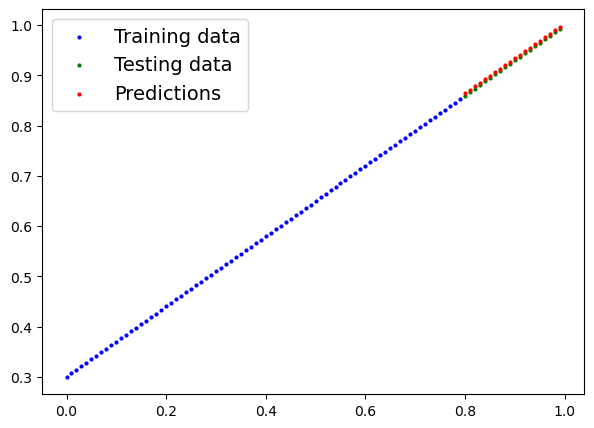

In [23]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_perdictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())

In [24]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2.Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVEPATH = MODEL_PATH / MODEL_NAME

# 3. Saave the model state dict
print("Saving model to : {}".format(MODEL_SAVE_PATH))
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_0.pth


In [25]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put model to target device
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")



Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


C:\Users\ijaeh\AppData\Local\Temp\ipykernel_2556\1262325761.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [26]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')